<a href="https://colab.research.google.com/github/Jayaprakash1710/Module-21-Computer-vision/blob/main/DJ_Lec_3_CNN_under_the_hood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC

Downloading...
From (original): https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC
From (redirected): https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC&confirm=t&uuid=8db052cd-88a7-427d-a6c7-2f64593150c0
To: /content/clothing-dataset-small.zip
100% 106M/106M [00:00<00:00, 157MB/s]


In [2]:
!unzip /content/clothing-dataset-small.zip

Archive:  /content/clothing-dataset-small.zip
   creating: clothing-dataset-small/
  inflating: clothing-dataset-small/.DS_Store  
   creating: clothing-dataset-small/test/
   creating: clothing-dataset-small/test/skirt/
  inflating: clothing-dataset-small/test/skirt/f4b934fc-e326-4f72-b535-53288b8b82d3.jpg  
  inflating: clothing-dataset-small/test/skirt/491982c3-3e90-431e-99e6-b14ecea36384.jpg  
  inflating: clothing-dataset-small/test/skirt/24963db3-649c-4f04-8da3-0375ede8e0a6.jpg  
  inflating: clothing-dataset-small/test/skirt/32b99302-cec7-4dec-adfa-3d4029674209.jpg  
  inflating: clothing-dataset-small/test/skirt/0558b2c5-be00-49de-b27f-8c88114ac36f.jpg  
  inflating: clothing-dataset-small/test/skirt/95e66e02-b4ed-4fe9-b538-db6bac4fb7df.jpg  
  inflating: clothing-dataset-small/test/skirt/2001dec1-1e0a-4c11-9d15-120b019b3dea.jpg  
  inflating: clothing-dataset-small/test/skirt/b0e05193-cc92-4935-88d7-e71a1b19dd4b.jpg  
  inflating: clothing-dataset-small/test/skirt/309829b2-6d1

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

import os
import glob #makes is easy to navigate folders
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.keras.utils.set_random_seed(111)

import warnings
warnings.filterwarnings("ignore")


In [4]:
def load_data(base_dir="clothing-dataset-small"):
    # checking if the data folders are present
    assert os.path.exists(f"{base_dir}/train") and os.path.exists(f"{base_dir}/validation") and os.path.exists(f"{base_dir}/test")

    print('\nLoading Data...')
    train_data = tf.keras.utils.image_dataset_from_directory(
        f"{base_dir}/train", shuffle=True, label_mode='categorical'
    )
    val_data = tf.keras.utils.image_dataset_from_directory(
        f"{base_dir}/validation", shuffle=False, label_mode='categorical'
    )
    test_data = tf.keras.utils.image_dataset_from_directory(
        f"{base_dir}/test", shuffle=False, label_mode='categorical'
    )
    return train_data, val_data, test_data, train_data.class_names

In [5]:
train_data, val_data, test_data, class_names = load_data()


Loading Data...
Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.
Found 372 files belonging to 10 classes.


In [6]:
def preprocess(train_data, val_data, test_data, target_height=128, target_width=128):

    # Data Processing Stage with resizing and rescaling operations
    data_preprocess = keras.Sequential(
        name="data_preprocess",
        layers=[
            layers.Resizing(target_height, target_width),
            layers.Rescaling(1.0/255),
        ]
    )

    # Perform Data Processing on the train, val, test dataset
    train_ds = train_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    test_ds = test_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)

    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = preprocess(train_data, val_data, test_data)

In [8]:
def baseline(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Flatten(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [9]:
model = baseline()
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,780,490 (64.01 MB)

 Trainable params: 16,780,490 (64.01 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
def compile_train_v1(model, train_ds, val_ds, ckpt_path="/tmp/checkpoint.weights.h5"):
    epochs = 10
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    ])
    return model_fit

In [11]:
model_fit = compile_train_v1(model, train_ds, val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.2622 - loss: 3.7747 - val_accuracy: 0.4135 - val_loss: 1.8120
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.5602 - loss: 1.3798 - val_accuracy: 0.5279 - val_loss: 1.5092
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.7225 - loss: 0.9167 - val_accuracy: 0.5396 - val_loss: 1.4982
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.8518 - loss: 0.5471 - val_accuracy: 0.5865 - val_loss: 1.4861
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9258 - loss: 0.3118 - val_accuracy: 0.5894 - val_loss: 1.5032
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9719 - loss: 0.1626 - val_accuracy: 0.6070 - val_loss: 1.5634
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9837 - loss: 0.0958 - val_accuracy: 0.5953 - val_loss: 1.7180
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9957 - loss: 0.0461 - val_accuracy: 0.592

In [12]:
# helper function to annotate maximum values in the plots
def annot_max(x,y, xytext=(0.94,0.96), ax=None, only_y=True):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    if only_y:
        text = "{:.2f}%".format(ymax)
    else:
        text= "x={:.2f}, y={:.2f}%".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=xytext, **kw)

def plot_accuracy(model_fit):
    #accuracy graph
    x = range(0,len(model_fit.history['accuracy']))
    y_train = [acc * 100 for acc in model_fit.history['accuracy']]
    y_val = [acc * 100 for acc in model_fit.history['val_accuracy']]

    plt.plot(x, y_train, label='Train', color='b')
    annot_max(x, y_train, xytext=(0.7,0.9))
    plt.plot(x, y_val, label='Val', color='r')
    annot_max(x, y_val, xytext=(0.8,0.7))
    plt.ylabel('Accuracy', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend()
    plt.show()

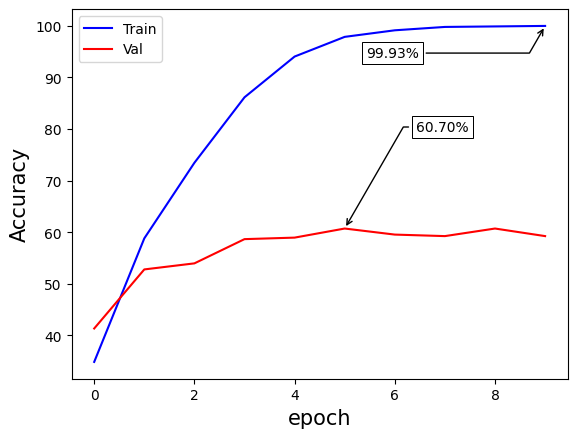

In [13]:
plot_accuracy(model_fit)

In [14]:
def print_accuracy_stats(model, ds, class_names):
    model.load_weights("/tmp/checkpoint.weights.h5")
    true_onehot = tf.concat([y for x, y in ds], axis=0)
    true_categories = tf.argmax(true_onehot, axis=1)
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)

    test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
    print(f'\nTest Accuracy: {test_acc:.2f}%\n')

# Note: This doesn't work with shuffled datasets
def plot_confusion_matrix(model, ds, class_names):
    model.load_weights("/tmp/checkpoint.weights.h5")
    true_onehot = tf.concat([y for x, y in ds], axis=0)
    true_categories = tf.argmax(true_onehot, axis=1)
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, cmap="YlGnBu", fmt='g')
    plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step

Test Accuracy: 52.69%

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


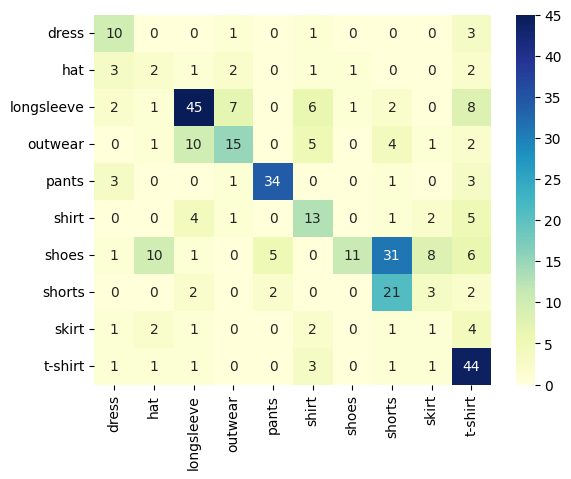

In [15]:
print_accuracy_stats(model, test_ds, class_names)
plot_confusion_matrix(model, test_ds, class_names)

# Architecture - 1

In [16]:
def arch_1(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_1",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [17]:
model = arch_1()
model.summary()

Model: "model_cnn_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,970 (1.76 MB)

 Trainable params: 460,970 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
def compile_train_v1(model, train_ds, val_ds, epochs=10, ckpt_path="/tmp/checkpoint.weights.h5"):
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
    ])
    return model_fit

In [19]:
model_fit = compile_train_v1(model, train_ds, val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.2621 - loss: 2.1544 - val_accuracy: 0.2434 - val_loss: 2.1616
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.2862 - loss: 2.0671 - val_accuracy: 0.3079 - val_loss: 2.0130
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.3375 - loss: 1.9361 - val_accuracy: 0.3431 - val_loss: 1.9289
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.3769 - loss: 1.7993 - val_accuracy: 0.3548 - val_loss: 1.7862
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.4381 - loss: 1.6444 - val_accuracy: 0.4340 - val_loss: 1.7553
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.4842 - loss: 1.5455 - val_accuracy: 0.5191 - val_loss: 1.4874
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.5245 - loss: 1.3790 - val_accuracy: 0.5279 - val_loss: 1.4293
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.5711 - loss: 1.2679 - val_accuracy: 0.5601 -

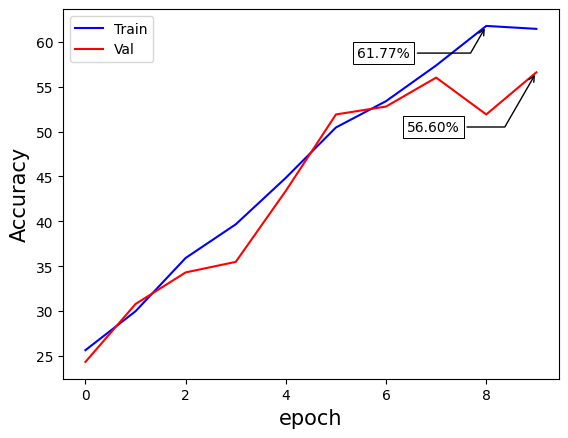

In [20]:
plot_accuracy(model_fit)

In [21]:
model_fit = compile_train_v1(model, train_ds, val_ds, epochs=30)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.6520 - loss: 1.0036 - val_accuracy: 0.6364 - val_loss: 1.1104
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.6912 - loss: 0.8879 - val_accuracy: 0.6393 - val_loss: 1.0733
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7128 - loss: 0.8438 - val_accuracy: 0.6481 - val_loss: 1.1361
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.7311 - loss: 0.7798 - val_accuracy: 0.6481 - val_loss: 1.1931
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.7328 - loss: 0.7513 - val_accuracy: 0.6364 - val_loss: 1.0873
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.7490 - loss: 0.7183 - val_accuracy: 0.6628 - val_loss: 1.0068
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.7715 - loss: 0.6551 - val_accuracy: 0.6510 - val_loss: 1.1246
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7908 - loss: 0.5932 - val_accuracy: 0.69

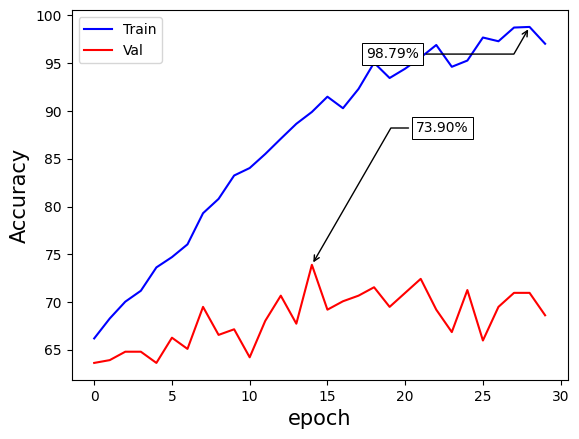

In [22]:
plot_accuracy(model_fit)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step

Test Accuracy: 69.89%

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


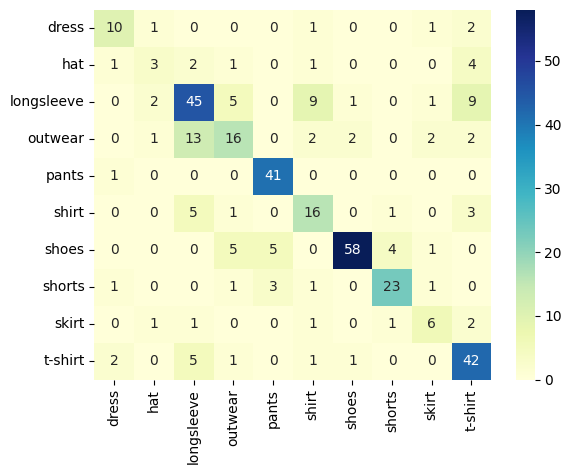

In [23]:
print_accuracy_stats(model, test_ds, class_names)
plot_confusion_matrix(model, test_ds, class_names)

# Architecture-2

In [26]:
def arch_2(height=128, width=128):
    num_classes = 10
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_2",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(height, width, 3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [27]:
model = arch_2()
model.summary()

Model: "model_cnn_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             

 Total params: 463,978 (1.77 MB)

 Trainable params: 462,474 (1.76 MB)

 Non-trainable params: 1,504 (5.88 KB)

In [28]:
model_fit = compile_train_v1(model, train_ds, val_ds, epochs=30)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 106ms/step - accuracy: 0.2129 - loss: 2.8888 - val_accuracy: 0.2375 - val_loss: 3.0740
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.3374 - loss: 2.2602 - val_accuracy: 0.2375 - val_loss: 3.9930
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.4077 - loss: 1.9671 - val_accuracy: 0.3050 - val_loss: 2.6617
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.4969 - loss: 1.6139 - val_accuracy: 0.3636 - val_loss: 2.2599
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.5193 - loss: 1.5093 - val_accuracy: 0.4457 - val_loss: 1.7786
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5879 - loss: 1.2899 - val_accuracy: 0.5132 - val_loss: 1.4301
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.6239 - loss: 1.1379 - val_accuracy: 0.5367 - val_loss: 1.4142
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.6711 - loss: 1.0143 - val_accuracy: 0.5660 

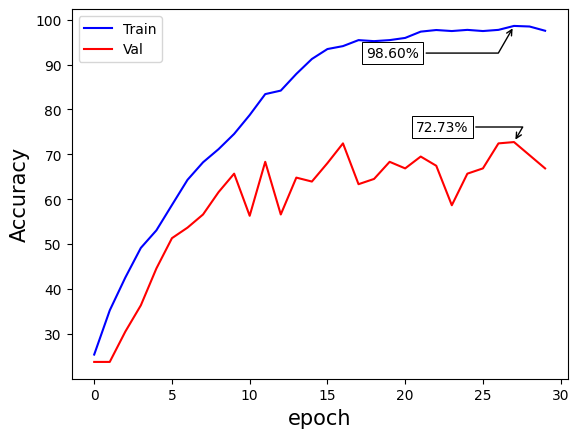

In [29]:
plot_accuracy(model_fit)

In [30]:
def compile_train_v2(model, train_ds, val_ds, epochs=10, ckpt_path="/tmp/checkpoint.weights.h5"):
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001
        ),
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
        keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, min_delta=0.001, mode='min'
        )
    ]
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=callbacks)
    return model_fit

In [31]:
model = arch_2()
model_fit = compile_train_v2(model, train_ds, val_ds, epochs=100)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.2217 - loss: 2.9073 - val_accuracy: 0.2375 - val_loss: 2.8104 - learning_rate: 0.0010
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.3265 - loss: 2.2543 - val_accuracy: 0.1085 - val_loss: 3.2576 - learning_rate: 0.0010
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.3735 - loss: 2.0263 - val_accuracy: 0.3548 - val_loss: 2.2079 - learning_rate: 0.0010
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.4617 - loss: 1.7346 - val_accuracy: 0.4076 - val_loss: 1.8357 - learning_rate: 0.0010
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.4949 - loss: 1.5851 - val_accuracy: 0.3959 - val_loss: 1.8179 - learning_rate: 0.0010
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.5605 - loss: 1.3617 - val_accuracy: 0.4516 - val_loss: 1.5561 - learning_rate: 0.0010
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5906 - loss: 1.2

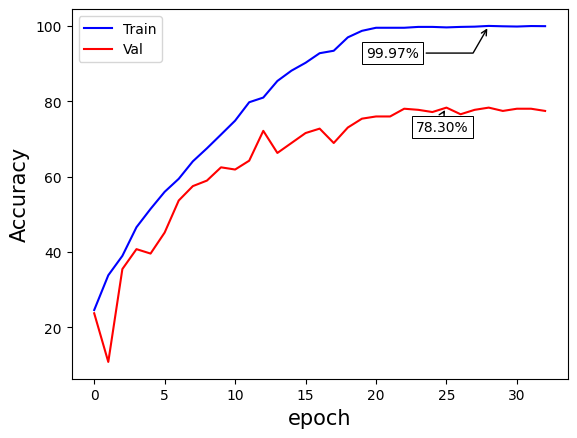

In [32]:
plot_accuracy(model_fit)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step

Test Accuracy: 71.77%

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


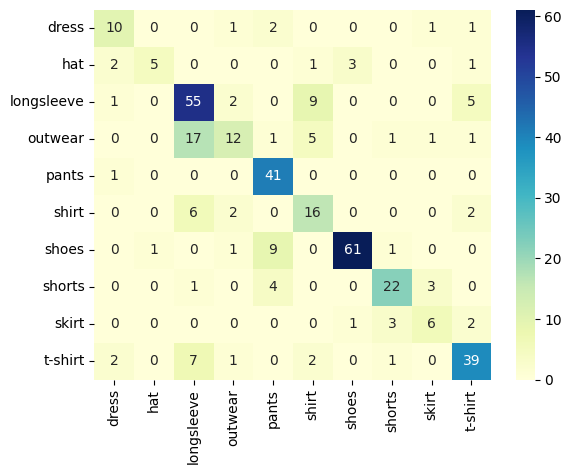

In [33]:
print_accuracy_stats(model, test_ds, class_names)
plot_confusion_matrix(model, test_ds, class_names)

In [34]:
!nvidia-smi

Wed May 14 07:51:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             33W /   70W |    1148MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----